<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

In last couple of years, more than 2 million students took SAT in each year. This number confirm gaining greater access and opportunity$^{1}$. In order to achieve success at large scale, questions to explore in such exams are: Does the SAT need to focus on increasing its participation rates? or The number of SAT test-takers can be increased by resources?  

Citations:
<br>
1: https://www.collegeboard.org/releases/2018/more-than-2-million-students-in-class-of-2018-took-sat-highest-ever

### Contents:
- [Description of the 2017-2018 SAT data columns](#Description-of-the-2017-SAT-data-columns)
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [External Research](#External-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
***

## Description of the 2017-2018 SAT data columns

**SAT 2017 & 2018 data**
<br>
The SAT 2017-2018 dataset showcases the participation rates of high school students in the class of 2017-2018 from 52 states who took the SAT and how they performed on the SAT. The columns of the SAT 2017-2018 dataset are:
- State: Names of US states 
- Participation: The percentage of 2017-2018 graduating seniors who took the SAT
- Evidence-Based Reading and Writing (ERW): The mean score of this particular category of the SAT
- Math: The mean score of this particular category of the SAT
- Total: The sum of the mean scores of ERW and Math

In [1]:
# import of major libraries first
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns

from IPython.display import HTML, display
from IPython.display import Image


## 2017 Data Import and Cleaning

### 1. SAT Data Import

In [2]:
# Import csv into Pandas DataFrame and save into new variables

sat_2017 = pd.read_csv('./data/sat_2017.csv')
sat_2018 = pd.read_csv('./data/sat_2018.csv')

### 2. Display Data: SAT 2017-2018

In [4]:
# The first ten rows of sat_2017 and sat_2018

print(sat_2017.head(8))
sat_2018.head(8)

         State Participation  Evidence-Based Reading and Writing  Math  Total
0      Alabama            5%                                 593   572   1165
1       Alaska           38%                                 547   533   1080
2      Arizona           30%                                 563   553   1116
3     Arkansas            3%                                 614   594   1208
4   California           53%                                 531   524   1055
5     Colorado           11%                                 606   595   1201
6  Connecticut          100%                                 530   512   1041
7     Delaware          100%                                 503   492    996


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998


### 3. Datatypes

In [5]:
# Datatypes of sat_2017

print(sat_2017.dtypes)
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object


State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

### 4a. Stating the errors in the data.

In the dataset, the "Participation" values are percentages, but they are processing as strings.

### 4b. Fixing incorrect datatypes in data.

In [6]:
# A function to convert percentage strings to floats. 

def convert_percent_to_float(df, column_name):
    df[column_name] = df[column_name].map(lambda par_cell: par_cell.replace('%', '')) # Remove percentage sign 
    df[column_name] = df[column_name].astype(float)                                   # Convert string to float
    df[column_name] = df[column_name].map(lambda par_cell: par_cell/100)              # Divide number by 100
    print(df[column_name].dtypes)                                                     # Print column dtype to ensure the change has been made.
    return (df[column_name].head())                                                   # Return column head to check data.


In [7]:
# Calling the function to turn Percentage into float values in year 2017

convert_percent_to_float(sat_2017, 'Participation')

float64


0    0.05
1    0.38
2    0.30
3    0.03
4    0.53
Name: Participation, dtype: float64

In [7]:
# Calling the function to turn Percentage into float values in year 2018

convert_percent_to_float(sat_2018, 'Participation')

float64


0    0.06
1    0.43
2    0.29
3    0.05
4    0.60
Name: Participation, dtype: float64

### 4c. Checking the Min/Max to ensure all values are within range.

**Checking the Min/Max Values in SAT **: The range of scores for the [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/) Math and ERW sections is 200-800. 

In [8]:
#Minimum values in the dataset for year 2017-2018. 

print(sat_2017.min())

print(sat_2018.min())

State                                 Alabama
Participation                            0.02
Evidence-Based Reading and Writing        482
Math                                       52
Total                                     950
dtype: object
State                                 Alabama
Participation                            0.02
Evidence-Based Reading and Writing        480
Math                                      480
Total                                     977
dtype: object


In [9]:
#Maximum values in the dataset for year 2017-2018. 

print(sat_2017.max())
print(sat_2018.max())

State                                 Wyoming
Participation                               1
Evidence-Based Reading and Writing        644
Math                                      651
Total                                    1295
dtype: object
State                                 Wyoming
Participation                               1
Evidence-Based Reading and Writing        643
Math                                      655
Total                                    1298
dtype: object


After reviewing the min and max for the sat_2017 dataset, there appears to be an error: 
- The minimum value for "Math" is 52, which is below the minimum value in the range 200-800

In [10]:
sat_2017.sort_values(['Math']).head(1)

# The lowest value in Math, 52, needs to be changed. 
# Subtract the Writing score from the Total to find the real value of Math, which is 524.

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,0.69,536,52,1060


In [11]:
# Find the row and column where the number needs to change, and assign new number. 

sat_2017.loc[20, 'Math'] = 524

In [12]:
# Check to see if the number was replaced. 

sat_2017['Math'][20]

524

### **5. Preview the data after errors have been fixed.**

In [13]:
#The first 10 rows of the SAT 2017 dataset.

sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055
5,Colorado,0.11,606,595,1201
6,Connecticut,1.00,530,512,1041
7,Delaware,1.00,503,492,996
8,District of Columbia,1.00,482,468,950
9,Florida,0.83,520,497,1017


In [14]:
#The first 10 rows of the SAT 2018 dataset.

sat_2018.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076
5,Colorado,1.00,519,506,1025
6,Connecticut,1.00,535,519,1053
7,Delaware,1.00,505,492,998
8,District of Columbia,0.92,497,480,977
9,Florida,0.56,550,549,1099


### 6. Rename Columns

In [15]:
# Create a dictionary to change names, and specify test type and year. 

sat_new_columns_dict = {'State':'state',
                        'Participation': 'sat_participation_17',
                        'Evidence-Based Reading and Writing': 'sat_ewb_17',
                        'Math': 'sat_math_17',
                        'Total': 'sat_total_17'}

sat_2017.rename(columns=sat_new_columns_dict, inplace=True)

In [16]:
sat_2017.head()

,state,sat_participation_17,sat_ewb_17,sat_math_17,sat_total_17
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [17]:
# Create a dictionary to change names, and specify test type and year. 

sat_new_columns_dict = {'State':'state',
                        'Participation': 'sat_participation_18',
                        'Evidence-Based Reading and Writing': 'sat_ewb_18',
                        'Math': 'sat_math_18',
                        'Total': 'sat_total_18'}

sat_2018.rename(columns=sat_new_columns_dict, inplace=True)

In [18]:
sat_2018.head()

,state,sat_participation_18,sat_ewb_18,sat_math_18,sat_total_18
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [19]:
# Call the columns again to ensure all changes were made. 

sat_2017.columns

Index(['state', 'sat_participation_17', 'sat_ewb_17', 'sat_math_17',
       'sat_total_17'],
      dtype='object')

In [20]:
# Call the columns again to ensure all changes were made. 

sat_2018.columns

Index(['state', 'sat_participation_18', 'sat_ewb_18', 'sat_math_18',
       'sat_total_18'],
      dtype='object')

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [21]:
def mean(list_number):
    list_number = [1,2,3,4,5]
    return sum(list_number)/len(list_number)
mean([1,2,3,4,5])    

3.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [22]:
def get_std(list_to_use):
    is_mean = sum(list_to_use)/len(list_to_use)
    #return mean
    sum_of_sq_vals = 0
    for i in list_to_use:
        subt = i - is_mean
        sq = subt ** 2
        sum_of_sq_vals += sq
    num_vals = list_to_use.size
    stdev = sum_of_sq_vals / num_vals
    final_stdev = stdev ** .5
    #print("Function std is:", final_stdev)
    return final_stdev

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [23]:
# A function to convert percentage strings to floats. 

def convert_percent_to_float(df, column_name):
    df[column_name] = df[column_name].map(lambda par_cell: par_cell.replace('%', '')) # Remove percentage sign 
    df[column_name] = df[column_name].astype(float)                                   # Convert string to float
    df[column_name] = df[column_name].map(lambda par_cell: par_cell/100)              # Divide number by 100
    print(df[column_name].dtypes)                                                     # Print column dtype to ensure the change has been made.
    return (df[column_name].head())                                                   # Return column head to check data.


## Exploratory Data Analysis


### Summary Statistics

In [24]:
# Calling the describe feature to showcase summary statistics

sat_2017.describe().round(2)

,sat_participation_17,sat_ewb_17,sat_math_17,sat_total_17
count,51.00,51.00,51.00,51.00
mean,0.40,569.12,556.88,1126.10
std,0.35,45.67,47.12,92.49
min,0.02,482.00,468.00,950.00
25%,0.04,533.50,523.50,1055.50
50%,0.38,559.00,548.00,1107.00
75%,0.66,613.00,599.00,1212.00
max,1.00,644.00,651.00,1295.00


In [25]:
# Calling the describe feature to showcase summary statistics

sat_2018.describe().round(2)

,sat_participation_18,sat_ewb_18,sat_math_18,sat_total_18
count,51.00,51.00,51.00,51.00
mean,0.46,563.69,556.24,1120.02
std,0.37,47.50,47.77,94.16
min,0.02,480.00,480.00,977.00
25%,0.04,534.50,522.50,1057.50
50%,0.52,552.00,544.00,1098.00
75%,0.78,610.50,593.50,1204.00
max,1.00,643.00,655.00,1298.00


In [26]:
# Dictionary comprehension to apply std to each numeric column in the dataframe. 

sd = {col: round(get_std(sat_2017[col]),6) for col in sat_2017.columns if ((sat_2017[col].dtype == float) | (sat_2017[col].dtype == 'int64'))} 
sd

{'sat_participation_17': 0.349291,
 'sat_ewb_17': 45.21697,
 'sat_math_17': 46.657134,
 'sat_total_17': 91.583511}

#### Investigating trends in the data

- **The following states have the highest and lowest participation rates for the:**
    - **2017 SAT:** 
      - Highest: Connecticut, Delaware, D.C., Michigan
      - Lowest: North Dakota, Mississippi, Iowa
    - **2018 SAT:**
      - Highest: Colorado, Connecticut, Delaware, Idaho, Michigan
      - Lowest: North Dakota
    
<br>
- **The following states have the highest and lowest mean total/composite scores for the:**
    - **2017 SAT:**
      - Highest: Minnesota
      - Lowest: D.C.
    - **2018 SAT:**
        - Highest: Minnesota
        - Lowest: D.C.
   
<br>
<br>
- **The following states had a 100% participation rate in 2017 but not in 2018:**
  - **SAT:** D.C.
 
<br>
<br>
- **Oregon had >50% participation on both tests for all years.** 

**Additional Observations:**
- SAT: 
 - DC had 100% and 92% participation rates in 2017 and 2018 respectively, but performed the poorest in both years. 


## Visualize the Data

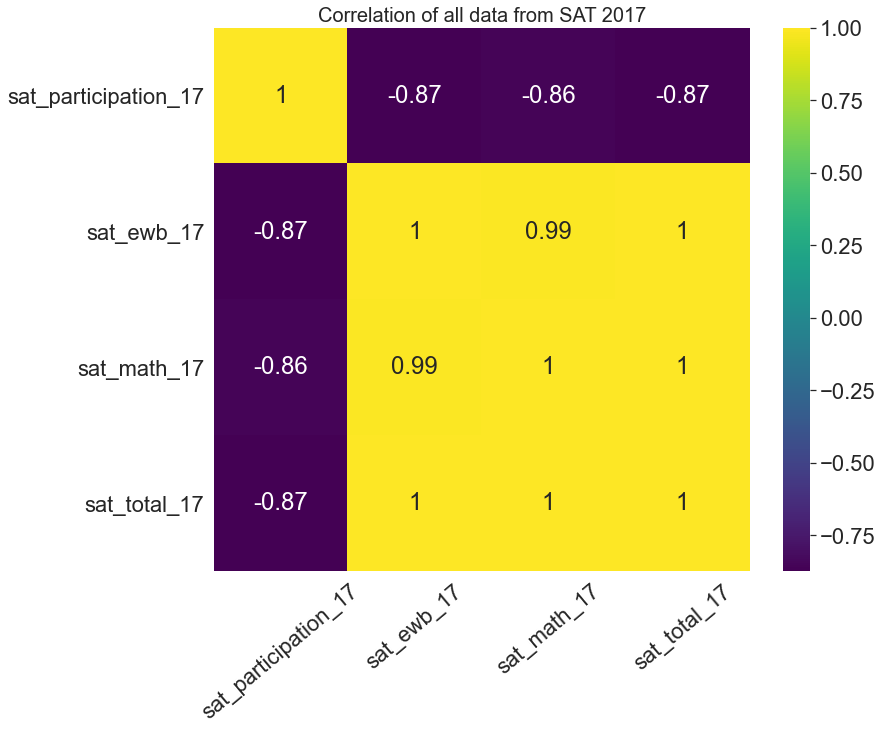

In [97]:
plt.figure(figsize=(12, 10))
sns.set(font_scale = 2)
plt.title('Correlation of all data from SAT 2017', size=20)
sns.heatmap(sat_2017.corr(), annot = True, cmap = 'viridis')
plt.xticks(rotation=40)
plt.show()

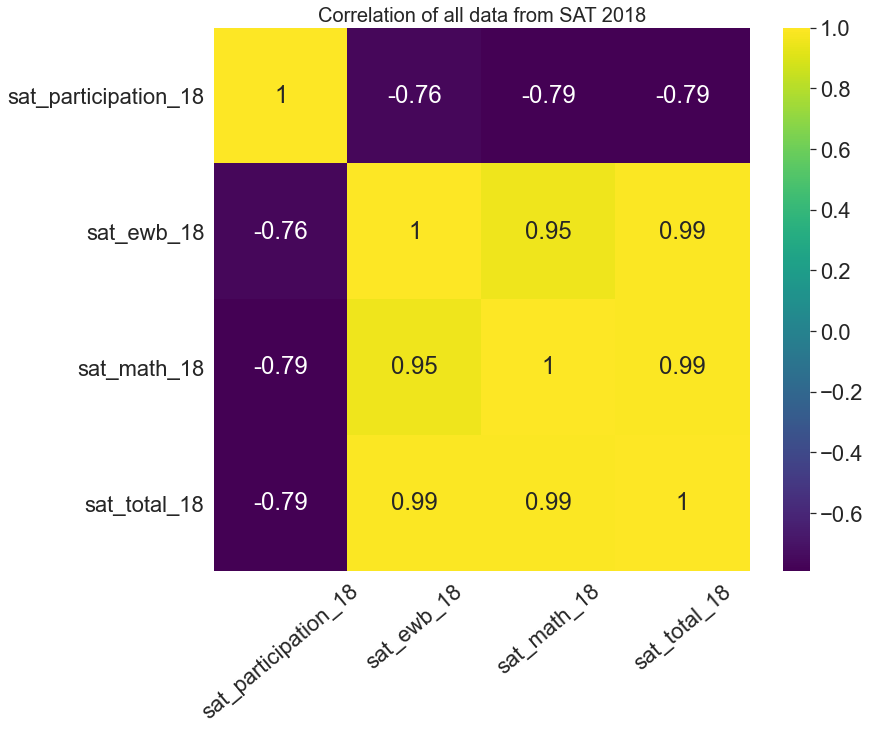

In [98]:
plt.figure(figsize=(12, 10))
sns.set(font_scale = 2)
plt.title('Correlation of all data from SAT 2018', size=20)
sns.heatmap(sat_2018.corr(), annot = True, cmap = 'viridis')
plt.xticks(rotation=40)
plt.show()

The correlation between test score totals and participations rates in both years, is negative. This means that the higher the participation rate, the lower the test scores.

### A histogram represents the frequency distribution of continuous variables.

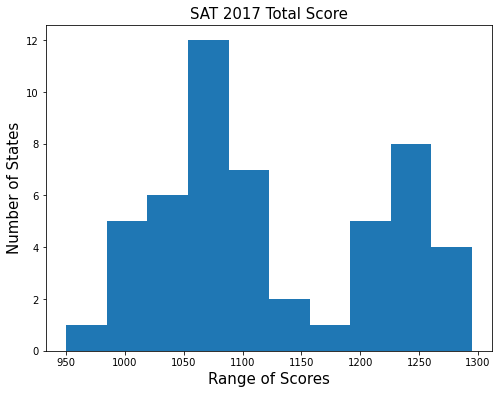

In [52]:
# create a histograms of 2017 data

plt.figure(figsize=(8,6))
plt.hist(x = sat_2017['sat_total_17'])

plt.xlabel('Range of Scores', fontsize = 15)
plt.ylabel('Number of States', fontsize = 15)
plt.title('SAT 2017 Total Score', fontsize = 15)
plt.show()

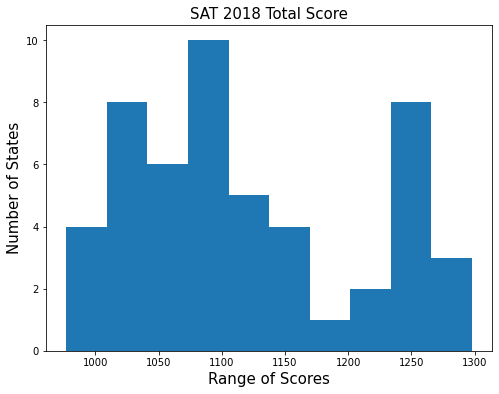

In [56]:
# create a histograms of 2018 data

plt.figure(figsize=(8,6))
plt.hist(x = sat_2018['sat_total_18'])


plt.xlabel('Range of Scores', fontsize = 15)
plt.ylabel('Number of States', fontsize = 15)
plt.title('SAT 2018 Total Score', fontsize = 15)
plt.show()

These histograms show that students are either performing very well or very poor (bimodal).

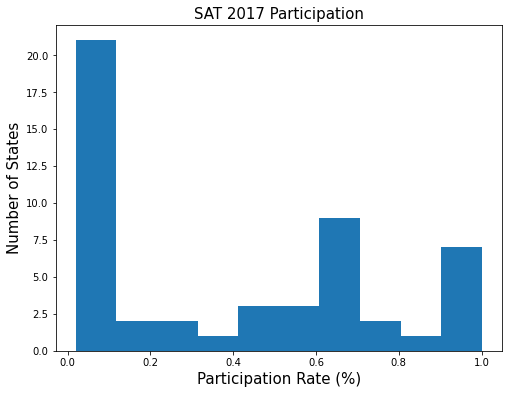

In [86]:
# histogram for the partocipation rate in 2017
plt.figure(figsize=(8,6))
plt.hist(x = sat_2017['sat_participation_17'])

plt.xlabel('Participation Rate (%)', fontsize = 15)
plt.ylabel('Number of States', fontsize = 15)
plt.title('SAT 2017 Participation', fontsize = 15)
plt.show()

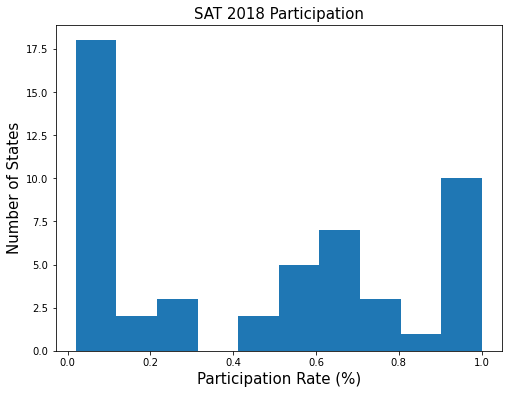

In [87]:
# histogram for the partocipation rate in 2018
plt.figure(figsize=(8,6))
plt.hist(x = sat_2018['sat_participation_18'])

plt.xlabel('Participation Rate (%)', fontsize = 15)
plt.ylabel('Number of States', fontsize = 15)
plt.title('SAT 2018 Participation', fontsize = 15)
plt.show()

## The box extends from the lower to upper quartile values of the data, with a line at the median.
### A bar graph is a diagrammatic comparison of discrete variables.

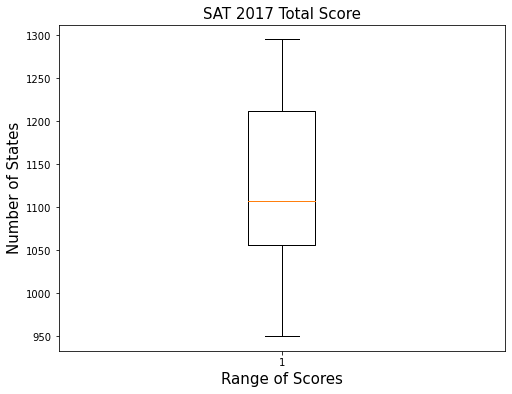

In [57]:
# create a boxplot of 2017 data

plt.figure(figsize=(8,6))
plt.boxplot(x = sat_2017['sat_total_17'])


plt.xlabel('Range of Scores', fontsize = 15)
plt.ylabel('Number of States', fontsize = 15)
plt.title('SAT 2017 Total Score', fontsize = 15)
plt.show()

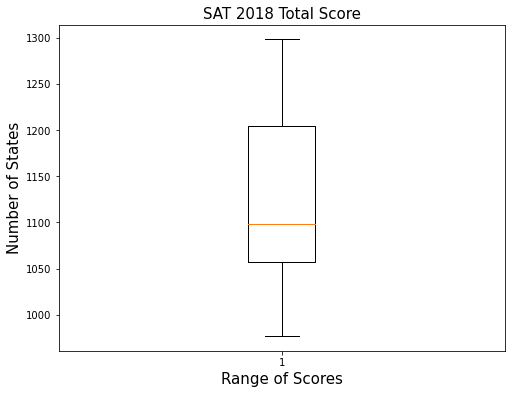

In [59]:
# create a boxplot of 2018 data

plt.figure(figsize=(8,6))
plt.boxplot(x = sat_2018['sat_total_18'])


plt.xlabel('Range of Scores', fontsize = 15)
plt.ylabel('Number of States', fontsize = 15)
plt.title('SAT 2018 Total Score', fontsize = 15)
plt.show()

According to the above barplot for both the years (2017-2018), the median is around 1100.

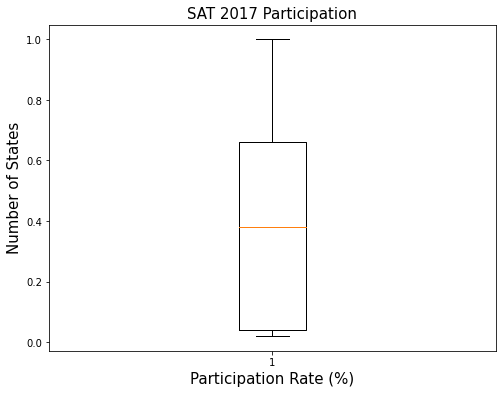

In [84]:
# create a boxplot of 2017 data

plt.figure(figsize=(8,6))
plt.boxplot(x = sat_2017['sat_participation_17'])

plt.xlabel('Participation Rate (%)', fontsize = 15)
plt.ylabel('Number of States', fontsize = 15)
plt.title('SAT 2017 Participation', fontsize = 15)
plt.show()

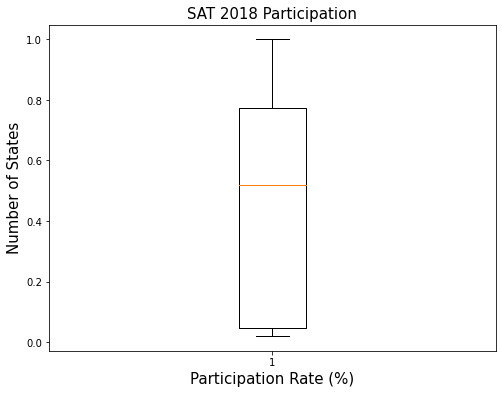

In [85]:
# create a boxplot of 2018 data

plt.figure(figsize=(8,6))
plt.boxplot(x = sat_2018['sat_participation_18'])

plt.xlabel('Participation Rate (%)', fontsize = 15)
plt.ylabel('Number of States', fontsize = 15)
plt.title('SAT 2018 Participation', fontsize = 15)
plt.show()

For 2017 data, the median is around 0.4 while in 2018 the same is more than 0.5.

## There are three types of correlation: positive, negative, and none (no correlation). Positive Correlation: as one variable increases so does the other. Height and shoe size are an example; as one's height increases so does the shoe size. Negative Correlation: as one variable increases, the other decreases.

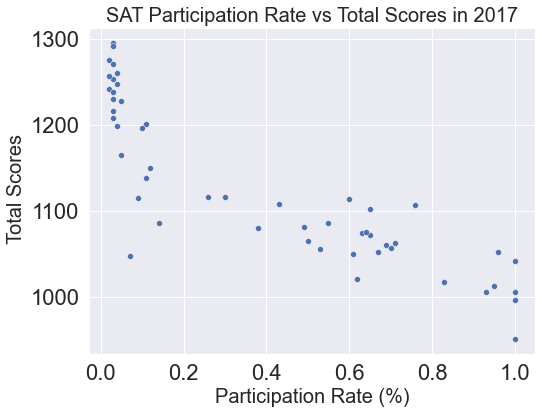

In [104]:
plt.figure(figsize= (8,6))

sns.scatterplot(x= 'sat_participation_17', y ='sat_total_17', data=sat_2017);
plt.xlabel('Participation Rate (%)', fontsize = 20)
plt.ylabel(' Total Scores', fontsize = 20)
plt.title('SAT Participation Rate vs Total Scores in 2017', fontsize = 20)
plt.show()

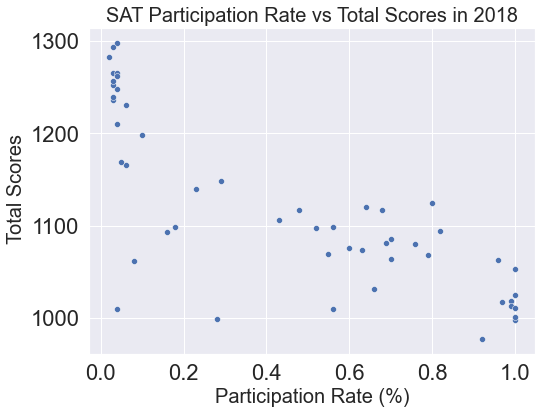

In [105]:
plt.figure(figsize= (8,6))

sns.scatterplot(x='sat_participation_18', y='sat_total_18', data=sat_2018);
plt.xlabel('Participation Rate (%)', fontsize = 20)
plt.ylabel(' Total Scores', fontsize = 20)
plt.title('SAT Participation Rate vs Total Scores in 2018', fontsize = 20)
plt.show()

According to initial heat map data, we can see confirmation of negative correlation between participation rate and test score. This is the most significant takeaway from these scatter plots.

#### The SAT datasets did not display normal distributions. 
- Across the board for participation rates and test scores, the distributions of the data tended to be bimodal or non-normal. For example, when observing the distribution of average SAT scores, students tended to perform either very poorly or very well. This is in contrast to a normal distribution where less students would have performed either very poorly or very well, and more students would have performed mediocrely. 

Let's take a closer look at the distriburions for Math and Reading scores, and Participation Rates for both tests in both years. 
- **Math**: In Math scores for both the SAT years, students tended to perform very poorly. The distribution of scores are right skewed, meaning that a majority of the data appears on the left side of the distribution where the score range is lower. The range for Math scores in the SAT is 200 - 800. For students in the US, the maximum Math score achieved in 2017 was 651 and in 2018 was 655. Students performed closer to the minimum score than the maximum score. 
<br>
<br>
- **Reading**: In the Reading scores for the SAT in both years, the distribution of the data is bimodal. That is, students tended to perform either very poorly or very well.
<br>
<br>
- **Participation Rates**: The distributions of the participation rates for the SAT in both years is bimodal, with a tendency for participation rates to be the far low end of the participation rates. A majority of states experienced extremely low participation rates on the SAT, and a few experienced extremely high participation rates.

**It does not make sense to conduct statistical inference** given these data specifically. The datasets for both tests provides data for all students in all states. Therefore, we are analyzing a population and not a sample. Statistical inference is conducted only when the data is a sampling of the population.

## External Research

Around 2 million students from the class of 2018 took the SAT, the highest ever.$^{1}$ In fact, there was a 27% increase in participation rates from the previous year.$^{2}$ SAT participation rates are so high that as of 2018, the test holds the title for "most widely used college admission test," beating the ACT where 1.91 million students took that test in the same year.$^{3}$  Although the SAT can celebrate this achievement, the data shows that there is a negative correlation between participation rates and test scores. This means that the higher the participation rate amongst all states the lower the average student test scores. 

Contrary to the College Board's claim that the SAT offers "greater access and opportunity" for students who take their test. But the higher the chances are of more students performing poorly. If taking the SAT is a significant contributor to college acceptance, the SAT itself is posing a burden to students' access to college. Instead of focusing on increasing participation rates, the SAT shows focus more test preparation resources.  

Citations
<br>
1: https://www.collegeboard.org/releases/2018/more-than-2-million-students-in-class-of-2018-took-sat-highest-ever
<br>
2: https://www.edweek.org/ew/articles/2018/10/31/sat-scores-rise-as-number-of-test-takers.html
<br>
3: https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/?utm_term=.c1ca18b8b596

## Conclusions and Recommendations

I found that the College Board is focusing on increasing participation rates while not focusing on the outcome of test scores. There is a significant negative correlation between participation rates and test scores, which means that the higher the participation rates, the lower the test scores (and vice versa). Focusing solely on increasing participation rates by the College Board is equivalent to the College Board assisting in  deterioration of test scores. This may help in achieving an ideal of a 100% participation rate, however, a majority of US high schoolers will perform very poorly on the test.
<br>
**Recommendations**
<br>
Therefore in order to achieve sustainable growth and be a resource trusted by students nationwide (i.e., its primary customers), I recommend the following:  
- Instead of keeping focus only on the participation rate, they must have to focus seriously towards improving access to test preparation resources. 
- Create a better test preparation support for states with highest participation rates, particularly in the East Coast where there is a concentration of states with high performance and low test scores.